# ANLY590 Homework1
## Hongyang Zheng

### Part 1
Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV

### 1.1
Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [2]:
# Read data
hitters=pd.read_csv('Hitters.csv')

# Look at the data
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Look at the shape
hitters.shape

(322, 21)

In [4]:
# Drop NA salary
hitters=hitters.dropna()

In [5]:
# Look at the type of each column
print(hitters.dtypes)

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object


In [6]:
# Select predictors and response
hitters.columns

Y=hitters['Salary'].values
X = hitters.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague', 'Salary'],axis=1)

In [7]:
# Build LASSO models
n_alphas = 200
alphas = np.logspace(3, -3, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, normalize = True, max_iter=10000)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)

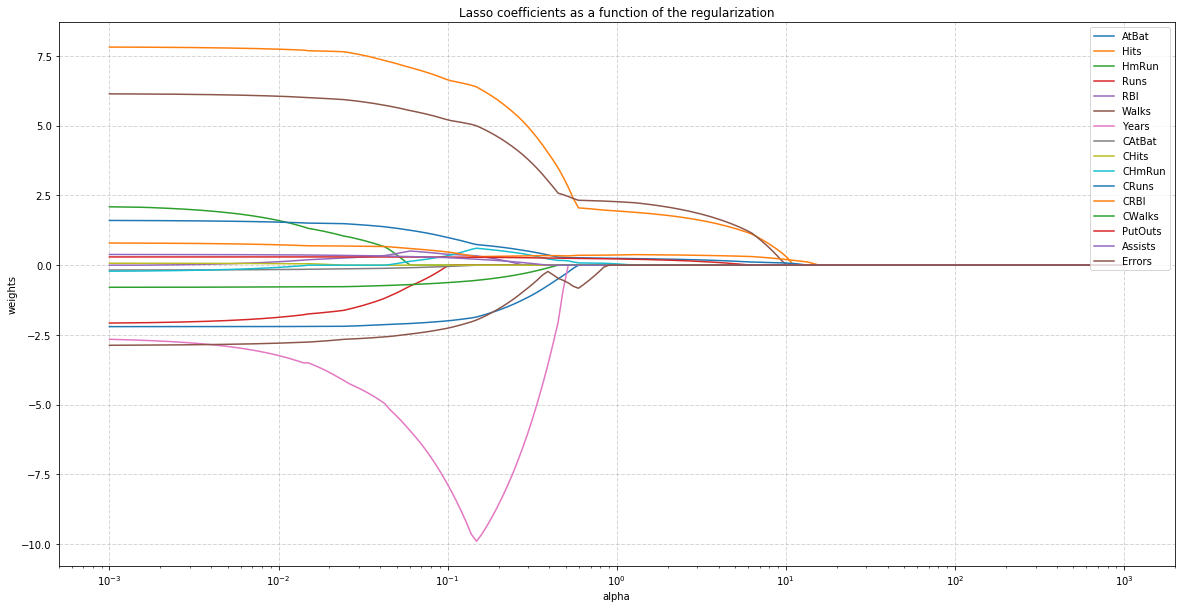

In [8]:
# Visualization of the coefficient trajectories
fig, ax = plt.subplots(figsize=(20,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(X.columns,loc=1)
plt.axis('tight')
plt.show()

From the above graph, we can see that when alpha is around 10, there are three predictors left.

In [9]:
# Find the last three predictors in the model
names=X.columns

# Try 10
coef = Lasso(alpha=10, normalize = True, max_iter=10000).fit(X, Y).coef_
names[abs(coef) != 0]

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')

The final three predictors that remain in the model are 'Hits', 'CRuns' and 'CRBI'.

In [10]:
# Use cross validation for lasso model
lasso_cv = LassoCV(cv=10, random_state=67, normalize = True, max_iter=10000).fit(X, Y)
optimal_lasso=list(zip(names,lasso_cv.coef_))

In [11]:
print('The optimal value of the regularization penality is: ')
print(lasso_cv.alpha_)

The optimal value of the regularization penality is: 
0.0635481759985745


In [12]:
coef = Lasso(alpha=lasso_cv.alpha_, normalize = True, max_iter=10000).fit(X, Y).coef_
len(names[abs(coef) != 0])

14

14 predictors are left in that model.

### 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross- validation to find the optimal vaule of the regularization penalty.

In [14]:
# Build Ridge models
n_alphas = 200
alphas = np.logspace(3, -3, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, normalize = True, max_iter=10000)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

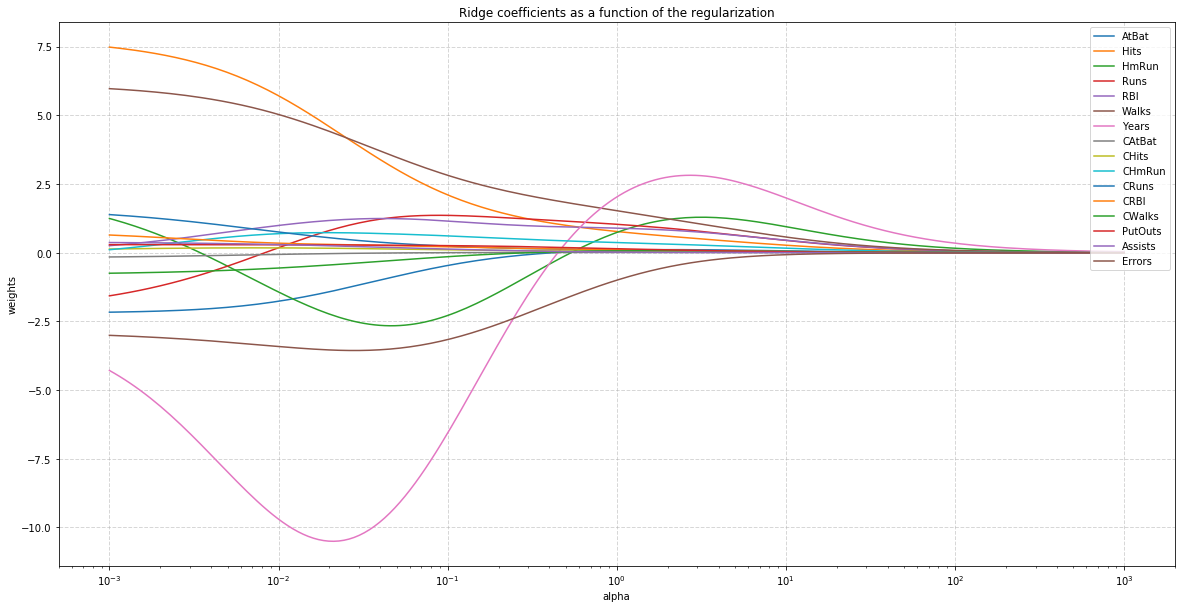

In [15]:
# Visualization of the coefficient trajectories
fig, ax = plt.subplots(figsize=(20,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(X.columns,loc=1)
plt.axis('tight')
plt.show()

In [16]:
# Use cross validation for ridge model
ridge_cv = RidgeCV(cv=10, normalize = True).fit(X, Y)
optimal_ridge=list(zip(names,ridge_cv.coef_))

In [17]:
print('The optimal value of the regularization penality is: ')
print(ridge_cv.alpha_)

The optimal value of the regularization penality is: 
1.0


### Part 2
Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

### bias-variance tradeoff
When we try to increase the accuracy of the model (reduce bias), we need to make our model more complex, and it will increase the variance of the model since the model will follow the data closer. However, when we want to reduce the variance of the model, we need to make our model simpler, and the bias will increase as a cost. As a result, bias and variance is a tradeoff.

### the role regularization plays in this tradeoff
To achieve a good balance between bias and variance, we need to reduce the variance a little bit for a low-bias model and that is the role regularization plays in the tradeoff. Via regularization, we can shrink or eliminate the influence of some predictors, so the model can have a not-high bias and a not-high variance.

### reference to your findings in number (1)
The lasso model uses L1 regularization as penalty, and it can force the coefficients for some predictors to be smaller or even 0. As shown in graph1, when we increase the alpha, we increase the penalty as well, so more and more predictors are forced to have lower influence or 0 influence. In this situation, the model will have lower variance and higher bias. On the contrary, if we decrease the penalty, the model will have higher variance and lower bias.

The ridge model uses L2 regularization as penalty, and it can force the coefficients for some predictors to be smaller but not 0. As shown in graph2, when we increase the alpha, we increase the penalty as well, so more and more predictors are forced to have lower influence. In this situation, the model will have lower variance and higher bias. On the contrary, if we decrease the penalty, the model will have higher variance and lower bias.